In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# cd '/content/gdrive/My Drive/'

/content/gdrive/My Drive


In [ ]:
!pip install -q pycaret # need restart runtime

     |████████████████████████████████| 256kB 5.2MB/s 
     |████████████████████████████████| 174kB 13.0MB/s 
     |████████████████████████████████| 102kB 8.5MB/s 
     |████████████████████████████████| 13.9MB 318kB/s 
     |████████████████████████████████| 266kB 40.7MB/s 
     |████████████████████████████████| 157.5MB 53kB/s 
     |████████████████████████████████| 66.3MB 61kB/s 
     |████████████████████████████████| 276kB 51.0MB/s 
     |████████████████████████████████| 6.8MB 38.6MB/s 
     |████████████████████████████████| 1.8MB 50.7MB/s 
     |████████████████████████████████| 1.6MB 46.2MB/s 
     |████████████████████████████████| 2.1MB 42.0MB/s 
     |████████████████████████████████| 163kB 40.4MB/s 
     |████████████████████████████████| 1.1MB 35.8MB/s 
     |████████████████████████████████| 337kB 38.7MB/s 
     |████████████████████████████████| 153kB 47.2MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 

In [ ]:
import pandas as pd, numpy as np, re, time

# Load the data
data = pd.read_csv('/content/gdrive/My Drive/data/hackathon_train.csv', sep=',', encoding="UTF-8")
data.head()

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
0,1,TENNESSEE: We're the best state. Nobody even c...,1,2.42,1.0,0.2
1,2,A man inserted an advertisement in the classif...,1,2.50,1.0,1.1
2,3,How many men does it take to open a can of bee...,1,1.95,0.0,2.4
3,4,Told my mom I hit 1200 Twitter followers. She ...,1,2.11,1.0,0.0
4,5,Roses are dead. Love is fake. Weddings are bas...,1,2.78,0.0,0.1


In [ ]:
pip install -U pandas-profiling[notebook]

In [ ]:
from pandas_profiling import ProfileReport

ProfileReport(data)

In [ ]:
import re 
import string
# from nltk.stem.porter import PorterStemmer

# ps = PorterStemmer()

# Define a function to clean the data
def clean_text_round1(text):
    text = text.lower() #lower case
    text = re.sub("[^a-zA-Z]",' ',text) # remove any character that is not a word
    # text = ps.stem(text) # stemming the text
    return text

round1 = lambda x:clean_text_round1(x)

In [ ]:
data_clean = data.copy() # copy the original dataframe
data_clean.text = pd.DataFrame(data.text.apply(round1)) # clean the data
data_clean # display results

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
0,1,tennessee we re the best state nobody even c...,1,2.42,1.0,0.20
1,2,a man inserted an advertisement in the classif...,1,2.50,1.0,1.10
2,3,how many men does it take to open a can of bee...,1,1.95,0.0,2.40
3,4,told my mom i hit twitter followers she ...,1,2.11,1.0,0.00
4,5,roses are dead love is fake weddings are bas...,1,2.78,0.0,0.10
...,...,...,...,...,...,...
7995,7996,lack of awareness of the pervasiveness of raci...,0,NaN,NaN,0.25
7996,7997,why are aspirins white because they work sorry,1,1.33,0.0,3.85
7997,7998,today we americans celebrate our independence...,1,2.55,0.0,0.00
7998,7999,how to keep the flies off the bride at an ital...,1,1.00,0.0,3.00


In [ ]:
# Define stop words
# our_stopwords = {'about', 'all', 'an', 'and', 'are', 'at', 'be', 'but', 'can', 'do', 'don', 'for','have','how','if', 'in','is', 'it','just','like','me','my','not','of', 'on',
#            'people','so','that','the','they','to','was','we','what','when','with','you','your'}
our_stopwords = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into',
'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more',
'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does',
'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't',
'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']

In [ ]:
# Define stop words
our_stopwords= frozenset(our_stopwords)
type(our_stopwords)

frozenset

In [ ]:
# Convert from set to frozenset
def add_len(df):
    df.insert(2,'len',df.text.str.split().str.len(),True)
    return df

In [ ]:
data_clean = add_len(data_clean) # call the function
data_clean['humor_rating'] = data_clean['humor_rating'].fillna(0) # fill missing values with zeros
data_clean # display results

,id,text,len,is_humor,humor_rating,humor_controversy,offense_rating
0,1,tennessee we re the best state nobody even c...,18,1,2.42,1.0,0.20
1,2,a man inserted an advertisement in the classif...,31,1,2.50,1.0,1.10
2,3,how many men does it take to open a can of bee...,26,1,1.95,0.0,2.40
3,4,told my mom i hit twitter followers she ...,26,1,2.11,1.0,0.00
4,5,roses are dead love is fake weddings are bas...,12,1,2.78,0.0,0.10
...,...,...,...,...,...,...,...
7995,7996,lack of awareness of the pervasiveness of raci...,28,0,0.00,NaN,0.25
7996,7997,why are aspirins white because they work sorry,8,1,1.33,0.0,3.85
7997,7998,today we americans celebrate our independence...,14,1,2.55,0.0,0.00
7998,7999,how to keep the flies off the bride at an ital...,20,1,1.00,0.0,3.00


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text using TFIDF
cv = TfidfVectorizer(strip_accents = 'ascii', stop_words=our_stopwords ,max_features = 5000)
data_cv = cv.fit_transform(data_clean.text)
data_dtm = pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm # display results

,abc,ability,able,abraham,abroad,absolutely,academy,accept,acceptable,accepted,accepting,access,accident,accidentally,according,account,accurate,accused,acid,acids,ackles,acne,across,act,acting,action,actions,active,activity,actor,actors,acts,actual,actually,ad,adapt,add,added,addicted,addiction,...,wrapped,wrinkles,write,writer,writers,writes,writing,written,wrong,wrote,wtf,wurst,ya,yard,yeah,year,years,yell,yelled,yelling,yellow,yells,yes,yesterday,yet,yo,yodas,yoghurt,yogurt,york,young,younger,youth,youtube,yr,yup,zebra,zero,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_dtm.insert(0,'len',data_clean.len,True) # insert length feature
# data_dtm.insert(1,'is_humor',data_clean['is_humor'].astype(float),True) # insert is_humor feature
data_dtm # display results

,len,abc,ability,able,abraham,abroad,absolutely,academy,accept,acceptable,accepted,accepting,access,accident,accidentally,according,account,accurate,accused,acid,acids,ackles,acne,across,act,acting,action,actions,active,activity,actor,actors,acts,actual,actually,ad,adapt,add,added,addicted,...,wrapped,wrinkles,write,writer,writers,writes,writing,written,wrong,wrote,wtf,wurst,ya,yard,yeah,year,years,yell,yelled,yelling,yellow,yells,yes,yesterday,yet,yo,yodas,yoghurt,yogurt,york,young,younger,youth,youtube,yr,yup,zebra,zero,zone,zoo
0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from pycaret.classification import *
# from pycaret.regression import *

In [ ]:
data_dtm = data_dtm.assign(is_humor = data_clean.is_humor) # insert is_humor label
data_dtm # display results

,len,abc,ability,able,abraham,abroad,absolutely,academy,accept,acceptable,accepted,accepting,access,accident,accidentally,according,account,accurate,accused,acid,acids,ackles,acne,across,act,acting,action,actions,active,activity,actor,actors,acts,actual,actually,ad,adapt,add,added,addicted,addiction,adding,address,adele,adjust,admit,adorable,adrenaline,ads,adult,adults,advantage,adventure,adventures,advice,af,affair,affected,afford,afraid,africa,african,afropunk,afternoon,age,agent,ages,aging,ago,agree,ah,ahead,aid,aids,ain,air,aircraft,aired,airline,airlines,airplane,airplanes,airport,al,alabama,alarm,albert,album,alcohol,alcoholic,alert,alexa,algorithm,alive,allahu,allergy,allies,allow,allowed,allows,almost,alone,along,alphabet,already,alright,also,always,alzheimer,amazing,amazon,ambulance,america,american,americans,among,amount,amputee,anal,ancient,angel,angels,anger,angry,animal,animals,anime,ankle,anne,anniversary,announce,announced,announcement,annoy,annoyed,annoying,another,answer,answered,answers,ant,antarctica,anti,antioxidant,antioxidants,ants,anxiety,anybody,anymore,anyone,anything,anyway,anyways,anywhere,apart,apartment,apology,app,apparently,appear,appearance,apple,apples,apply,applying,appreciate,appreciated,approach,approaches,approaching,appropriate,approximately,april,aquatics,arab,arabs,arava,area,areas,aren,argue,arguing,argument,arguments,arizona,arkansas,arm,armed,arms,armstrong,army,arnold,around,aroused,arrest,arrested,arresting,arrive,arrived,arrives,arrow,art,article,artist,artists,arts,ash,ashamed,asia,asian,asians,aside,ask,asked,asking,asks,asleep,ass,asshole,associated,assume,assured,astronaut,astronauts,ate,atomic,attack,attacked,attacking,attacks,attempt,attempting,attendant,attention,attic,attitude,attorney,attract,attracted,attraction,attractive,audience,august,auntie,aunties,author,authority,autism,auto,autumn,...,views,vikings,villains,vincent,vinegar,vinson,violence,violent,virgin,virginity,virus,visibility,vision,visit,visits,vit,vitamin,vitamins,voice,voicemail,voices,volume,volunteer,vote,voted,voter,voting,vow,vs,vulnerable,waffle,waist,wait,waiter,waiting,waitress,waits,wake,wakes,waking,wal,waldman,walk,walked,walkers,walking,walks,wall,wallet,walls,walmart,walt,wanna,want,wanted,wanting,wants,war,wardrobe,warm,warned,warning,wars,wash,washing,washington,wasn,wasp,waste,wasted,wasting,watch,watched,watches,watching,water,watermelon,waterproof,wave,waves,waving,way,wayne,ways,weak,weaker,weakness,wealth,wealthy,weapon,weapons,wear,wearing,wears,weather,web,webmd,website,wedding,weed,week,weekend,weekends,weekly,weeks,weigh,weighed,weighs,weight,weird,welcome,well,wellness,went,weren,west,western,wet,whale,whales,whatever,whats,wheel,wheelchair,wheelchairs,wheels,whenever,wherever,whether,whilst,whiskey,whisper,whispering,whispers,whistle,white,whites,whoa,whoever,whole,whose,wi,wide,widow,wife,wifi,wig,wild,wildlife,wildly,williams,willing,willy,wilson,win,wind,window,wine,wing,wings,wink,winning,wins,winter,wisdom,wise,wish,wishes,wishing,witch,within,without,witness,witnesses,wives,wizard,woke,woman,women,won,wonder,wondered,wonderful,wondering,wonders,wonka,wood,wooden,woods,word,words,work,worked,worker,workers,working,workout,works,world,worried,worry,worrying,worse,worst,worth,would,wouldn,wounds,wow,wrapped,wrinkles,write,writer,writers,writes,writing,written,wrong,wrote,wtf,wurst,ya,yard,yeah,year,years,yell,yelled,yelling,yellow,yells,yes,yesterday,yet,yo,yodas,yoghurt,yogurt,york,young,younger,youth,youtube,yr,yup,zebra,zero,zone,zoo,is_humor
0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,

In [ ]:
# setup the dataset
grid = setup(data=data_dtm, target=data_dtm.columns[-1], html=False, silent=True, verbose=False)

In [ ]:
# evaluate models and compare models
best_model = compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8118,0.9002,0.929,0.7986,0.8589,0.581,0.5965,5.461


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
knn,K Neighbors Classifier,0.6596,0.6958,0.7257,0.7235,0.7244,0.2791,0.2794,6.674


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
nb,Naive Bayes,0.7189,0.7403,0.6965,0.8211,0.7535,0.4314,0.4396,0.424
knn,K Neighbors Classifier,0.6596,0.6958,0.7257,0.7235,0.7244,0.2791,0.2794,6.674


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
dt,Decision Tree Classifier,0.7258,0.7041,0.7973,0.7674,0.7819,0.4131,0.4141,7.882
nb,Naive Bayes,0.7189,0.7403,0.6965,0.8211,0.7535,0.4314,0.4396,0.424
knn,K Neighbors Classifier,0.6596,0.6958,0.7257,0.7235,0.7244,0.2791,0.2794,6.674


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
dt,Decision Tree Classifier,0.7258,0.7041,0.7973,0.7674,0.7819,0.4131,0.4141,7.882
nb,Naive Bayes,0.7189,0.7403,0.6965,0.8211,0.7535,0.4314,0.4396,0.424
knn,K Neighbors Classifier,0.6596,0.6958,0.7257,0.7235,0.7244,0.2791,0.2794,6.674
svm,SVM - Linear Kernel,0.6334,0.0000,0.6535,0.8205,0.6217,0.2467,0.3258,5.703


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8241,0.0000,0.8876,0.8371,0.8615,0.6210,0.6235,3.440
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
dt,Decision Tree Classifier,0.7258,0.7041,0.7973,0.7674,0.7819,0.4131,0.4141,7.882
nb,Naive Bayes,0.7189,0.7403,0.6965,0.8211,0.7535,0.4314,0.4396,0.424
knn,K Neighbors Classifier,0.6596,0.6958,0.7257,0.7235,0.7244,0.2791,0.2794,6.674
svm,SVM - Linear Kernel,0.6334,0.0000,0.6535,0.8205,0.6217,0.2467,0.3258,5.703


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8241,0.0000,0.8876,0.8371,0.8615,0.6210,0.6235,3.440
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
rf,Random Forest Classifier,0.7976,0.8700,0.9010,0.7974,0.8460,0.5542,0.5632,13.574
dt,Decision Tree Classifier,0.7258,0.7041,0.7973,0.7674,0.7819,0.4131,0.4141,7.882
nb,Naive Bayes,0.7189,0.7403,0.6965,0.8211,0.7535,0.4314,0.4396,0.424
knn,K Neighbors Classifier,0.6596,0.6958,0.7257,0.7235,0.7244,0.2791,0.2794,6.674
svm,SVM - Linear Kernel,0.6334,0.0000,0.6535,0.8205,0.6217,0.2467,0.3258,5.703


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8241,0.0000,0.8876,0.8371,0.8615,0.6210,0.6235,3.440
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
rf,Random Forest Classifier,0.7976,0.8700,0.9010,0.7974,0.8460,0.5542,0.5632,13.574
dt,Decision Tree Classifier,0.7258,0.7041,0.7973,0.7674,0.7819,0.4131,0.4141,7.882
qda,Quadratic Discriminant Analysis,0.6221,0.5083,0.9957,0.6207,0.7647,0.0202,0.0706,50.735
nb,Naive Bayes,0.7189,0.7403,0.6965,0.8211,0.7535,0.4314,0.4396,0.424
knn,K Neighbors Classifier,0.6596,0.6958,0.7257,0.7235,0.7244,0.2791,0.2794,6.674
svm,SVM - Linear Kernel,0.6334,0.0000,0.6535,0.8205,0.6217,0.2467,0.3258,5.703


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8241,0.0000,0.8876,0.8371,0.8615,0.6210,0.6235,3.440
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
rf,Random Forest Classifier,0.7976,0.8700,0.9010,0.7974,0.8460,0.5542,0.5632,13.574
ada,Ada Boost Classifier,0.7223,0.7880,0.9053,0.7181,0.8007,0.3618,0.3906,7.446
dt,Decision Tree Classifier,0.7258,0.7041,0.7973,0.7674,0.7819,0.4131,0.4141,7.882
qda,Quadratic Discriminant Analysis,0.6221,0.5083,0.9957,0.6207,0.7647,0.0202,0.0706,50.735
nb,Naive Bayes,0.7189,0.7403,0.6965,0.8211,0.7535,0.4314,0.4396,0.424
knn,K Neighbors Classifier,0.6596,0.6958,0.7257,0.7235,0.7244,0.2791,0.2794,6.674
svm,SVM - Linear Kernel,0.6334,0.0000,0.6535,0.8205,0.6217,0.2467,0.3258,5.703


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8241,0.0000,0.8876,0.8371,0.8615,0.6210,0.6235,3.440
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
rf,Random Forest Classifier,0.7976,0.8700,0.9010,0.7974,0.8460,0.5542,0.5632,13.574
gbc,Gradient Boosting Classifier,0.7303,0.8174,0.9325,0.7161,0.8100,0.3717,0.4130,27.679
ada,Ada Boost Classifier,0.7223,0.7880,0.9053,0.7181,0.8007,0.3618,0.3906,7.446
dt,Decision Tree Classifier,0.7258,0.7041,0.7973,0.7674,0.7819,0.4131,0.4141,7.882
qda,Quadratic Discriminant Analysis,0.6221,0.5083,0.9957,0.6207,0.7647,0.0202,0.0706,50.735
nb,Naive Bayes,0.7189,0.7403,0.6965,0.8211,0.7535,0.4314,0.4396,0.424
knn,K Neighbors Classifier,0.6596,0.6958,0.7257,0.7235,0.7244,0.2791,0.2794,6.674
svm,SVM - Linear Kernel,0.6334,0.0000,0.6535,0.8205,0.6217,0.2467,0.3258,5.703


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8241,0.0000,0.8876,0.8371,0.8615,0.6210,0.6235,3.440
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
rf,Random Forest Classifier,0.7976,0.8700,0.9010,0.7974,0.8460,0.5542,0.5632,13.574
gbc,Gradient Boosting Classifier,0.7303,0.8174,0.9325,0.7161,0.8100,0.3717,0.4130,27.679
ada,Ada Boost Classifier,0.7223,0.7880,0.9053,0.7181,0.8007,0.3618,0.3906,7.446
dt,Decision Tree Classifier,0.7258,0.7041,0.7973,0.7674,0.7819,0.4131,0.4141,7.882
qda,Quadratic Discriminant Analysis,0.6221,0.5083,0.9957,0.6207,0.7647,0.0202,0.0706,50.735
nb,Naive Bayes,0.7189,0.7403,0.6965,0.8211,0.7535,0.4314,0.4396,0.424
knn,K Neighbors Classifier,0.6596,0.6958,0.7257,0.7235,0.7244,0.2791,0.2794,6.674
lda,Linear Discriminant Analysis,0.5780,0.5794,0.5833,0.6853,0.6300,0.1462,0.1488,92.816


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8241,0.0000,0.8876,0.8371,0.8615,0.6210,0.6235,3.440
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
et,Extra Trees Classifier,0.8068,0.8761,0.8868,0.8160,0.8499,0.5801,0.5842,20.411
rf,Random Forest Classifier,0.7976,0.8700,0.9010,0.7974,0.8460,0.5542,0.5632,13.574
gbc,Gradient Boosting Classifier,0.7303,0.8174,0.9325,0.7161,0.8100,0.3717,0.4130,27.679
ada,Ada Boost Classifier,0.7223,0.7880,0.9053,0.7181,0.8007,0.3618,0.3906,7.446
dt,Decision Tree Classifier,0.7258,0.7041,0.7973,0.7674,0.7819,0.4131,0.4141,7.882
qda,Quadratic Discriminant Analysis,0.6221,0.5083,0.9957,0.6207,0.7647,0.0202,0.0706,50.735
nb,Naive Bayes,0.7189,0.7403,0.6965,0.8211,0.7535,0.4314,0.4396,0.424
knn,K Neighbors Classifier,0.6596,0.6958,0.7257,0.7235,0.7244,0.2791,0.2794,6.674


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8241,0.0000,0.8876,0.8371,0.8615,0.6210,0.6235,3.440
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
et,Extra Trees Classifier,0.8068,0.8761,0.8868,0.8160,0.8499,0.5801,0.5842,20.411
rf,Random Forest Classifier,0.7976,0.8700,0.9010,0.7974,0.8460,0.5542,0.5632,13.574
xgboost,Extreme Gradient Boosting,0.7742,0.8547,0.8960,0.7738,0.8304,0.4982,0.5105,75.597
gbc,Gradient Boosting Classifier,0.7303,0.8174,0.9325,0.7161,0.8100,0.3717,0.4130,27.679
ada,Ada Boost Classifier,0.7223,0.7880,0.9053,0.7181,0.8007,0.3618,0.3906,7.446
dt,Decision Tree Classifier,0.7258,0.7041,0.7973,0.7674,0.7819,0.4131,0.4141,7.882
qda,Quadratic Discriminant Analysis,0.6221,0.5083,0.9957,0.6207,0.7647,0.0202,0.0706,50.735
nb,Naive Bayes,0.7189,0.7403,0.6965,0.8211,0.7535,0.4314,0.4396,0.424


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8241,0.0000,0.8876,0.8371,0.8615,0.6210,0.6235,3.440
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
et,Extra Trees Classifier,0.8068,0.8761,0.8868,0.8160,0.8499,0.5801,0.5842,20.411
rf,Random Forest Classifier,0.7976,0.8700,0.9010,0.7974,0.8460,0.5542,0.5632,13.574
xgboost,Extreme Gradient Boosting,0.7742,0.8547,0.8960,0.7738,0.8304,0.4982,0.5105,75.597
lightgbm,Light Gradient Boosting Machine,0.7748,0.8526,0.8616,0.7917,0.8251,0.5104,0.5142,1.108
gbc,Gradient Boosting Classifier,0.7303,0.8174,0.9325,0.7161,0.8100,0.3717,0.4130,27.679
ada,Ada Boost Classifier,0.7223,0.7880,0.9053,0.7181,0.8007,0.3618,0.3906,7.446
dt,Decision Tree Classifier,0.7258,0.7041,0.7973,0.7674,0.7819,0.4131,0.4141,7.882
qda,Quadratic Discriminant Analysis,0.6221,0.5083,0.9957,0.6207,0.7647,0.0202,0.0706,50.735


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8241,0.0000,0.8876,0.8371,0.8615,0.6210,0.6235,3.440
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
et,Extra Trees Classifier,0.8068,0.8761,0.8868,0.8160,0.8499,0.5801,0.5842,20.411
rf,Random Forest Classifier,0.7976,0.8700,0.9010,0.7974,0.8460,0.5542,0.5632,13.574
catboost,CatBoost Classifier,0.7780,0.8668,0.9096,0.7714,0.8348,0.5032,0.5196,69.746
xgboost,Extreme Gradient Boosting,0.7742,0.8547,0.8960,0.7738,0.8304,0.4982,0.5105,75.597
lightgbm,Light Gradient Boosting Machine,0.7748,0.8526,0.8616,0.7917,0.8251,0.5104,0.5142,1.108
gbc,Gradient Boosting Classifier,0.7303,0.8174,0.9325,0.7161,0.8100,0.3717,0.4130,27.679
ada,Ada Boost Classifier,0.7223,0.7880,0.9053,0.7181,0.8007,0.3618,0.3906,7.446
dt,Decision Tree Classifier,0.7258,0.7041,0.7973,0.7674,0.7819,0.4131,0.4141,7.882


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8241,0.0000,0.8876,0.8371,0.8615,0.6210,0.6235,3.440
lr,Logistic Regression,0.8118,0.9002,0.9290,0.7986,0.8589,0.5810,0.5965,5.461
et,Extra Trees Classifier,0.8068,0.8761,0.8868,0.8160,0.8499,0.5801,0.5842,20.411
rf,Random Forest Classifier,0.7976,0.8700,0.9010,0.7974,0.8460,0.5542,0.5632,13.574
catboost,CatBoost Classifier,0.7780,0.8668,0.9096,0.7714,0.8348,0.5032,0.5196,69.746
xgboost,Extreme Gradient Boosting,0.7742,0.8547,0.8960,0.7738,0.8304,0.4982,0.5105,75.597
lightgbm,Light Gradient Boosting Machine,0.7748,0.8526,0.8616,0.7917,0.8251,0.5104,0.5142,1.108
gbc,Gradient Boosting Classifier,0.7303,0.8174,0.9325,0.7161,0.8100,0.3717,0.4130,27.679
ada,Ada Boost Classifier,0.7223,0.7880,0.9053,0.7181,0.8007,0.3618,0.3906,7.446
dt,Decision Tree Classifier,0.7258,0.7041,0.7973,0.7674,0.7819,0.4131,0.4141,7.882


In [ ]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=2402,
                solver='auto', tol=0.001)


In [ ]:
# Create a Ridge Classifier model
rdg = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8089,0.0,0.8844,0.8204,0.8512,0.5854,0.5886
1,0.8143,0.0,0.8497,0.8497,0.8497,0.6067,0.6067
2,0.8321,0.0,0.9017,0.8387,0.8691,0.6361,0.6393
3,0.8071,0.0,0.8725,0.8247,0.8479,0.5850,0.5868
4,0.8339,0.0,0.8986,0.8424,0.8696,0.6417,0.6443
5,0.8286,0.0,0.8725,0.8527,0.8625,0.6351,0.6353
6,0.8214,0.0,0.8899,0.8320,0.8599,0.6144,0.6171
7,0.8018,0.0,0.8638,0.8232,0.8430,0.5747,0.5759
8,0.8464,0.0,0.9246,0.8417,0.8812,0.6654,0.6713
9,0.8462,0.0,0.9188,0.8453,0.8806,0.6655,0.6701


In [ ]:
# Tune Hyperparameters
tuned_rdg = tune_model(rdg, optimize = 'F1')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.1min finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8179,0.0,0.9075,0.8177,0.8603,0.6008,0.6075
1,0.8232,0.0,0.8699,0.8479,0.8588,0.6226,0.6230
2,0.8375,0.0,0.9220,0.8329,0.8752,0.6441,0.6510
3,0.8179,0.0,0.8957,0.8240,0.8583,0.6046,0.6087
4,0.8393,0.0,0.9159,0.8382,0.8753,0.6505,0.6555
5,0.8286,0.0,0.8957,0.8374,0.8655,0.6298,0.6325
6,0.8143,0.0,0.8957,0.8196,0.8560,0.5961,0.6007
7,0.8089,0.0,0.8812,0.8216,0.8503,0.5870,0.5898
8,0.8464,0.0,0.9333,0.8364,0.8822,0.6636,0.6718
9,0.8426,0.0,0.9275,0.8355,0.8791,0.6552,0.6626


In [ ]:
print(tuned_rdg)

RidgeClassifier(alpha=1.75, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=False, random_state=2402,
                solver='auto', tol=0.001)


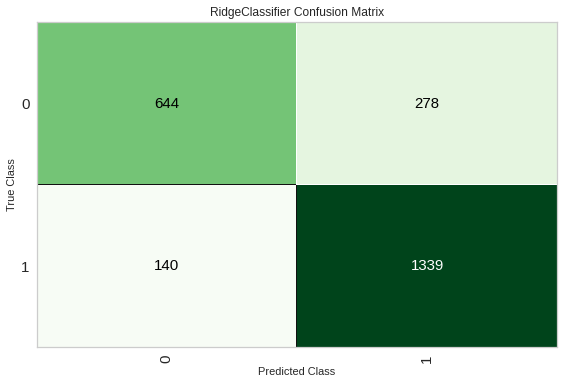

In [ ]:
# Plot confusion matrix
plot_model(tuned_rdg, plot = 'confusion_matrix')

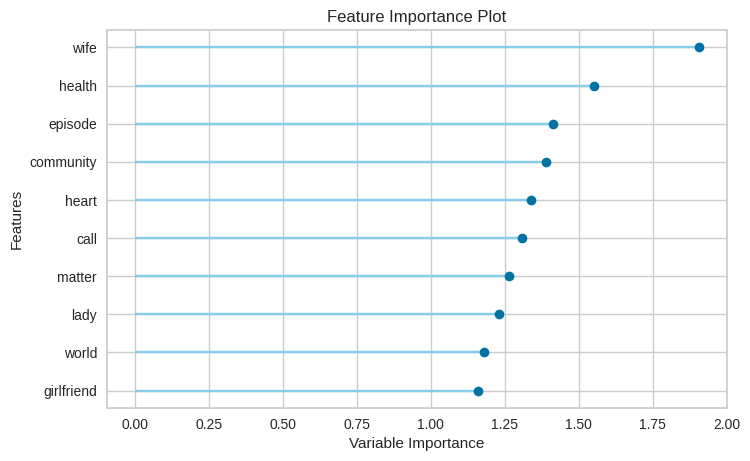

In [ ]:
# Check feature importance
plot_model(tuned_rdg, plot='feature')

In [ ]:
# Predict on test data
predict_model(tuned_rdg)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8259,0.8019,0.9053,0.8281,0.865,0.6213,0.6262


,len,abc,ability,able,abraham,abroad,absolutely,academy,accept,acceptable,accepted,accepting,access,accident,accidentally,according,account,accurate,accused,acid,acids,acne,across,act,acting,action,actions,active,activity,actor,actors,acts,actual,actually,ad,adapt,add,added,addicted,addiction,...,thesaurus_0.0,throat_0.36112362146377563,thrones_0.0,thrown_0.0,titles_0.0,toasted_0.39885950088500977,toni_0.8173412680625916,tony_0.0,touring_0.49286311864852905,tracking_0.0,trade_0.0,trainer_0.0,treats_0.0,trois_0.37291547656059265,tube_0.0,twain_0.3883279263973236,ty_0.0,tyrone_0.0,ultrasound_0.0,understands_0.0,unhealthy_0.26828232407569885,unique_0.40560004115104675,unusual_0.4301917254924774,usps_0.0,van_0.3583642244338989,vest_0.0,view_0.29418590664863586,vikings_0.0,voter_0.0,waffle_0.43556126952171326,walkers_0.32799533009529114,warning_0.38684192299842834,wasting_0.0,weak_0.0,webmd_0.34025031328201294,wheelchairs_0.45628422498703003,whistle_0.0,wonders_0.0,is_humor,Label
0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1,0
1,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1
2,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1
3,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0,0
4,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0,1
2397,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1
2398,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0,0
2399,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
# Save model
save_model(tuned_rdg,'Final Model-1')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='is_humor',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                 ('fix_perfect', Remove_100(target='is_humor')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
       

### Alternative model using Scikit Learn

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
y = data_clean.is_humor
X_train, X_test, y_train, y_test =  train_test_split(data_dtm[data_dtm.columns.difference(['is_humor'])], y,test_size = 0.1 ,random_state =123,shuffle =True)

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

# Use Ridge Classifier
sk_rdg = RidgeClassifier(alpha=1.75, fit_intercept=False, normalize=False, copy_X=True, max_iter=None, tol=0.001, class_weight=None, solver='auto', random_state=2402)

# Train the model
sk_rdg.fit(X_train, y_train)

# Get the mean F1 score of test data
print(f1_score(y_test, sk_rdg.predict(X_test)))

0.8590998043052838


In [ ]:
import pickle

# Save the model to disk
filename = '/content/gdrive/My Drive/models/Classif_Model-1.pkl'
pickle.dump(sk_rdg, open(filename, 'wb'))